In [97]:
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [98]:
epl_df = pd.read_csv("EPL_20_21.csv")
(epl_df.head())

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [99]:
epl_df.describe()

,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,25.500000,19.535714,15.714286,1411.443609,1.853383,1.287594,717.750000,77.823872,0.191729,0.234962,0.113289,0.072650,2.114662,0.090226
std,4.319404,11.840459,11.921161,1043.171856,3.338009,2.095191,631.372522,13.011631,0.850881,0.975818,0.148174,0.090072,2.269094,0.293268
min,16.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,9.000000,4.000000,426.000000,0.000000,0.000000,171.500000,73.500000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000
50%,26.000000,21.000000,15.000000,1345.000000,1.000000,0.000000,573.500000,79.200000,0.000000,0.000000,0.060000,0.050000,2.000000,0.000000
75%,29.000000,30.000000,27.000000,2303.500000,2.000000,2.000000,1129.500000,84.625000,0.000000,0.000000,0.150000,0.110000,3.000000,0.000000
max,38.000000,38.000000,38.000000,3420.000000,23.000000,14.000000,3214.000000,100.000000,9.000000,10.000000,1.160000,0.900000,12.000000,2.000000


In [100]:
epl_df.isnull().sum()

Name                     0
Club                     0
Nationality              0
Position                 0
Age                      0
Matches                  0
Starts                   0
Mins                     0
Goals                    0
Assists                  0
Passes_Attempted         0
Perc_Passes_Completed    0
Penalty_Goals            0
Penalty_Attempted        0
xG                       0
xA                       0
Yellow_Cards             0
Red_Cards                0
dtype: int64

In [101]:
epl_df["MinsPerMatch"] = (epl_df["Mins"]/epl_df["Matches"]).astype(int)
epl_df['GoalsPerMatch'] = (epl_df["Goals"]/epl_df["Matches"]).astype(float)
print(epl_df)

                  Name              Club Nationality Position  Age  Matches  \
0          Mason Mount           Chelsea         ENG    MF,FW   21       36   
1        Edouard Mendy           Chelsea         SEN       GK   28       31   
2          Timo Werner           Chelsea         GER       FW   24       35   
3         Ben Chilwell           Chelsea         ENG       DF   23       27   
4          Reece James           Chelsea         ENG       DF   20       32   
..                 ...               ...         ...      ...  ...      ...   
527        Lys Mousset  Sheffield United         FRA    FW,MF   24       11   
528     Jack O'Connell  Sheffield United         ENG       DF   26        2   
529      Iliman Ndiaye  Sheffield United         FRA       MF   21        1   
530  Antwoine Hackford  Sheffield United         ENG    DF,FW   16        1   
531        Femi Seriki  Sheffield United         ENG       DF   17        1   

     Starts  Mins  Goals  Assists  Passes_Attempted

In [102]:
Total_goals = epl_df["Goals"].sum()
print(Total_goals)

986


In [103]:
Total_penalty_Goals = epl_df["Penalty_Goals"].sum()
print(Total_penalty_Goals)

102


In [104]:
penalty_attempts = epl_df["Penalty_Attempted"].sum()
print(penalty_attempts)

125


([<matplotlib.patches.Wedge at 0x1d005b27470>,
 [Text(0.9212808433710818, 0.6010337824427744, 'Penalties Missed'),
  Text(-0.921280871507503, -0.6010337393145045, 'Penalties Scored')],
 [Text(0.5025168236569537, 0.3278366086051496, '18.40%'),
  Text(-0.5025168390040925, -0.32783658508063884, '81.60%')])

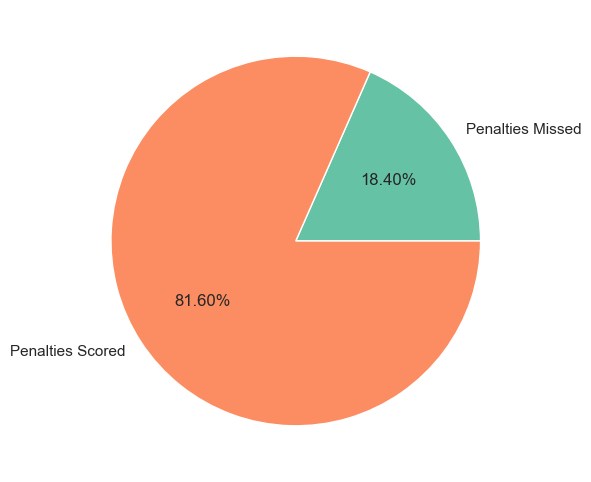

In [105]:
plt.figure(figsize=(13,6))
pl_not_scored = epl_df["Penalty_Attempted"].sum()-Total_penalty_Goals
data = [pl_not_scored,Total_penalty_Goals]
labels = ['Penalties Missed','Penalties Scored']
color = sb.color_palette('Set2')
plt.pie(data,labels=labels,colors=color,autopct='%1.2f%%')

In [106]:
#unique Positions
epl_df['Position'].unique()

array(['MF,FW', 'GK', 'FW', 'DF', 'MF', 'FW,MF', 'FW,DF', 'DF,MF',
       'MF,DF', 'DF,FW'], dtype=object)

In [107]:
#Total Forward players
epl_df[epl_df["Position"] == 'FW']


,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,74,0.171429
16,Tammy Abraham,Chelsea,ENG,FW,22,22,12,1040,6,1,218,68.3,0,0,0.56,0.07,0,0,47,0.272727
19,Olivier Giroud,Chelsea,FRA,FW,33,17,8,748,4,0,217,74.2,0,0,0.58,0.09,1,0,44,0.235294
23,Ruben Loftus-Cheek,Chelsea,ENG,FW,24,1,1,60,0,0,16,68.8,0,0,0.00,0.00,0,0,60,0.000000
30,Raheem Sterling,Manchester City,ENG,FW,25,31,28,2536,10,7,1127,85.4,0,1,0.43,0.17,4,0,81,0.322581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,Oliver Burke,Sheffield United,SCO,FW,23,25,14,1269,1,1,262,70.6,0,0,0.17,0.13,2,0,50,0.040000
518,Oliver McBurnie,Sheffield United,SCO,FW,24,23,12,1324,1,0,426,62.9,0,0,0.21,0.07,2,0,57,0.043478
519,Rhian Brewster,Sheffield United,ENG,FW,20,27,12,1128,0,0,225,69.3,0,0,0.14,0.13,1,0,41,0.000000
523,Billy Sharp,Sheffield United,ENG,FW,34,16,7,735,3,0,123,69.9,2,2,0.33,0.07,1,0,45,0.187500


<Axes: xlabel='Nationality'>

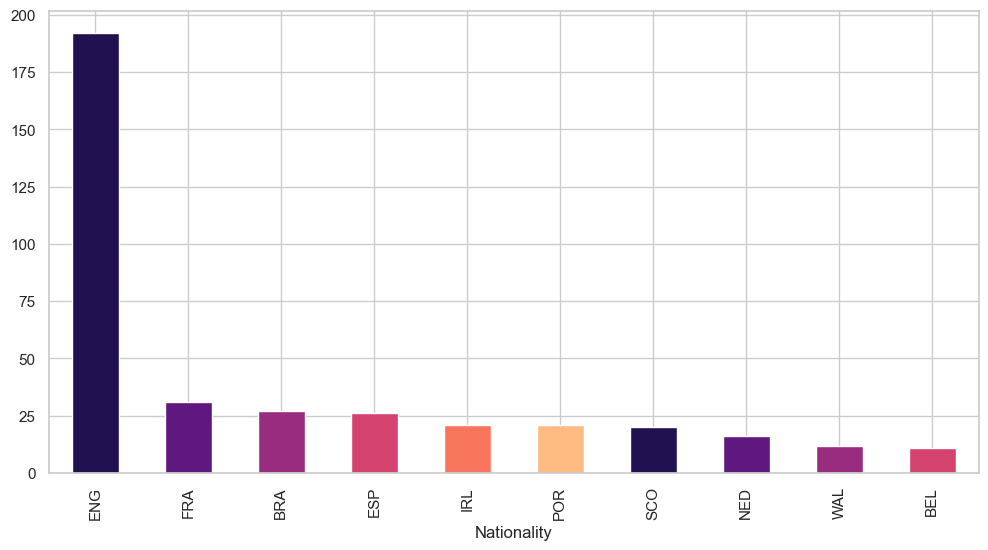

In [108]:
nationality = epl_df.groupby('Nationality').size().sort_values(ascending=False)
nationality.head(10).plot(kind='bar',figsize=(12,6),color=sb.color_palette('magma'))

<Axes: xlabel='Club'>

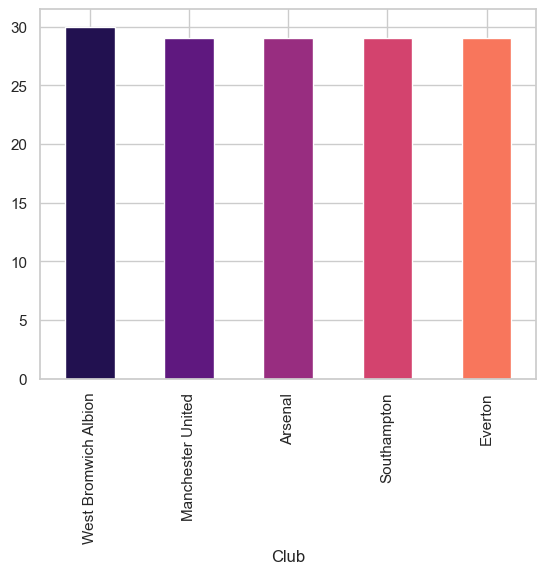

In [109]:
epl_df['Club'].value_counts().nlargest(5).plot(kind='bar',color=sb.color_palette("magma"))

<Axes: xlabel='Club'>

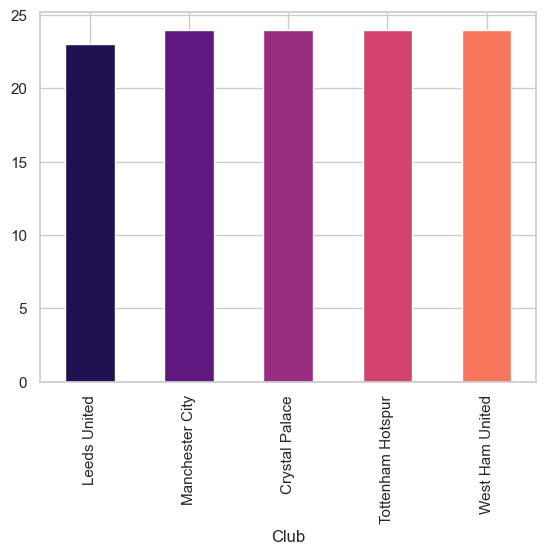

In [110]:
epl_df['Club'].value_counts().nsmallest(5).plot(kind='bar',color=sb.color_palette("magma"))

In [111]:
Under20 = epl_df[epl_df['Age']<=20]
age20_25 = epl_df[(epl_df['Age']>20) & (epl_df['Age']<=25)]
age25_30 = epl_df[(epl_df['Age']>25) & (epl_df['Age']<=30)]
above_30 = epl_df[epl_df['Age']>30]

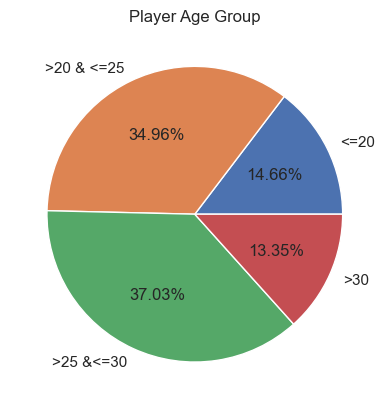

In [112]:
x = np.array([Under20['Name'].count(),age20_25['Name'].count(),age25_30['Name'].count(),above_30["Name"].count()])
label =["<=20",">20 & <=25",">25 &<=30",">30"]
plt.title("Player Age Group")
plt.pie(x,labels=label,autopct="%1.2f%%")
plt.show()

<Axes: xlabel='Club'>

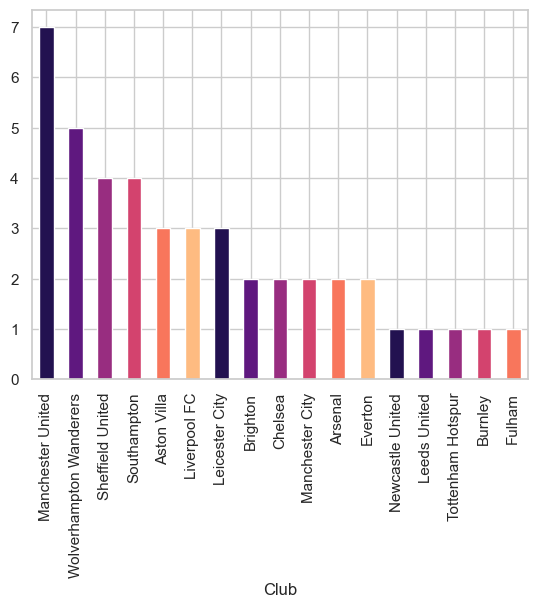

In [113]:
player_u20 = epl_df[epl_df['Age']<20]
player_u20['Club'].value_counts().plot(kind='bar',color=sb.color_palette('magma'))

In [114]:
player_u20[player_u20['Club']=="Manchester United"]

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
61,Mason Greenwood,Manchester United,ENG,FW,18,31,21,1822,7,2,732,83.1,0,0,0.37,0.09,2,0,58,0.225806
72,Brandon Williams,Manchester United,ENG,DF,19,4,2,188,0,0,140,85.7,0,0,0.05,0.01,0,0,47,0.000000
73,Amad Diallo,Manchester United,CIV,FW,18,3,2,166,0,1,64,84.4,0,0,0.02,0.26,0,0,55,0.000000
74,Anthony Elanga,Manchester United,SWE,FW,18,2,2,155,1,0,53,81.1,0,0,0.16,0.02,0,0,77,0.500000
76,Shola Shoretire,Manchester United,ENG,FW,16,2,0,11,0,0,8,75.0,0,0,0.00,0.00,0,0,5,0.000000
78,Hannibal Mejbri,Manchester United,FRA,MF,17,1,0,9,0,0,3,100.0,0,0,0.00,0.00,0,0,9,0.000000
79,William Thomas Fish,Manchester United,ENG,DF,17,1,0,1,0,0,1,0.0,0,0,0.00,0.00,0,0,1,0.000000


In [115]:
player_u20[player_u20["Club"]=="Chelsea"]

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
18,Callum Hudson-Odoi,Chelsea,ENG,"FW,DF",19,23,10,1059,2,3,659,82.2,0,0,0.12,0.26,0,0,46,0.086957
21,Billy Gilmour,Chelsea,SCO,MF,19,5,3,261,0,0,215,89.3,0,0,0.01,0.04,0,0,52,0.000000


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Chelsea'),
  Text(1, 0, 'Manchester City'),
  Text(2, 0, 'Manchester United'),
  Text(3, 0, 'Liverpool FC'),
  Text(4, 0, 'Leicester City'),
  Text(5, 0, 'West Ham United'),
  Text(6, 0, 'Tottenham Hotspur'),
  Text(7, 0, 'Arsenal'),
  Text(8, 0, 'Leeds United'),
  Text(9, 0, 'Everton'),
  Text(10, 0, 'Aston Villa'),
  Text(11, 0, 'Newcastle United'),
  Text(12, 0, 'Wolverhampton Wanderers'),
  Text(13, 0, 'Crystal Palace'),
  Text(14, 0, 'Southampton'),
  Text(15, 0, 'Brighton'),
  Text(16, 0, 'Burnley'),
  Text(17, 0, 'Fulham'),
  Text(18, 0, 'West Bromwich Albion'),
  Text(19, 0, 'Sheffield United')])

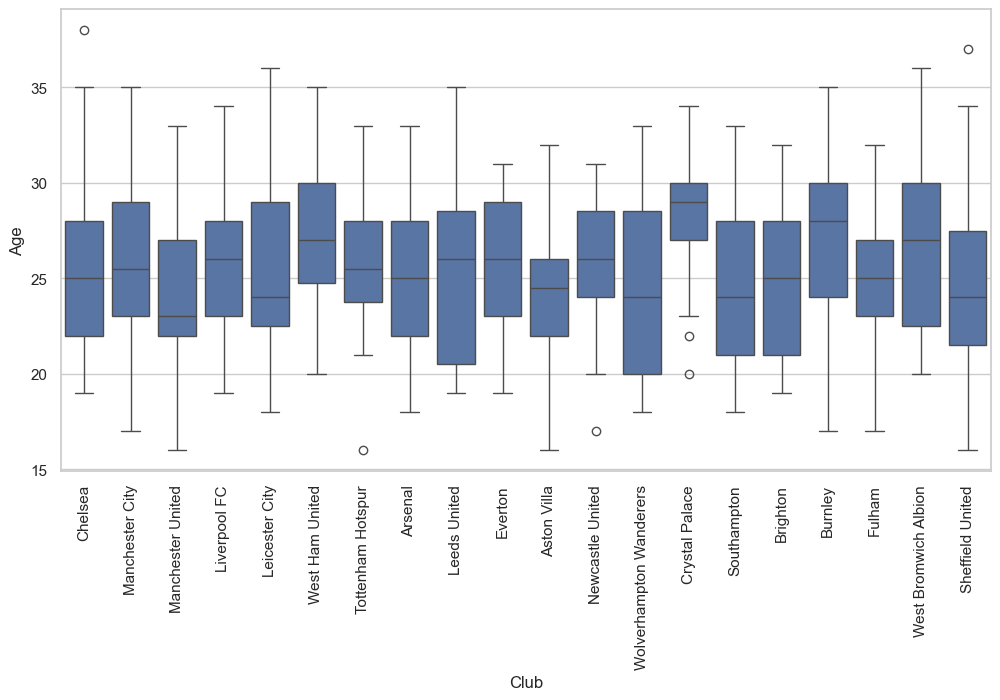

In [116]:
plt.figure(figsize=(12,6))
sb.boxplot(x="Club" ,y = 'Age',data = epl_df)
plt.xticks(rotation = 90)


C:\Users\Absaar\AppData\Local\Temp\ipykernel_33428\118395046.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sb.barplot(x="Club",y ="Goals",data=Goals_by_Clubs.sort_values(by="Goals"),palette='rocket')


Text(0.5, 1.0, 'Plot of Clubs Vs Total Goals')

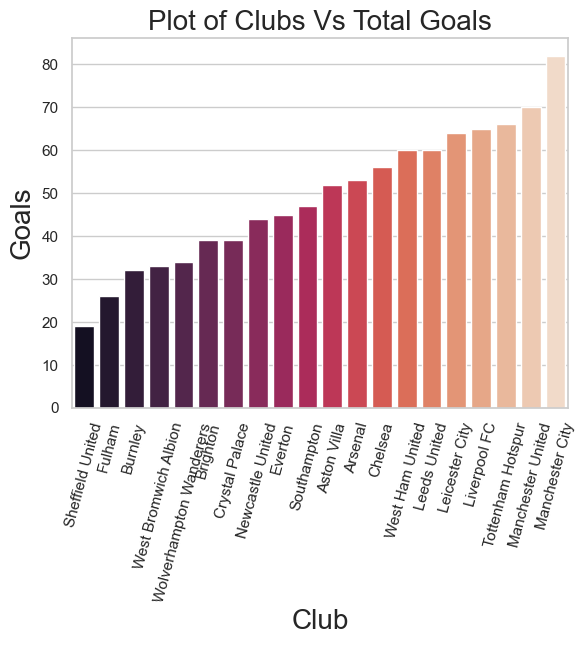

In [117]:
Goals_by_Clubs = pd.DataFrame(epl_df.groupby('Club',as_index=False)['Goals'].sum())
sb.set_theme(style="whitegrid",color_codes=True)
ax = sb.barplot(x="Club",y ="Goals",data=Goals_by_Clubs.sort_values(by="Goals"),palette='rocket')
ax.set_xlabel("Club", fontsize=20)
ax.set_ylabel("Goals",fontsize=20)
plt.xticks(rotation = 75)
plt.title('Plot of Clubs Vs Total Goals',fontsize= 20)


In [119]:
top_10_goalscorers = epl_df[["Name","Club","Goals","Matches"]].nlargest(n=10,columns='Goals')
top_10_goalscorers

,Name,Club,Goals,Matches
162,Harry Kane,Tottenham Hotspur,23,35
81,Mohamed Salah,Liverpool FC,22,37
51,Bruno Fernandes,Manchester United,18,37
161,Son Heung-min,Tottenham Hotspur,17,37
214,Patrick Bamford,Leeds United,17,38
237,Dominic Calvert-Lewin,Everton,16,33
110,Jamie Vardy,Leicester City,15,34
267,Ollie Watkins,Aston Villa,14,37
33,İlkay Gündoğan,Manchester City,13,28
191,Alexandre Lacazette,Arsenal,13,31
